### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

**Min-Max Scaling**, also known as Normalization, is a data preprocessing technique used to rescale features to a fixed range—typically [0, 1]. This is done by transforming the data so that the minimum value of a feature becomes 0 and the maximum becomes 1, with all other values scaled proportionally between them.

Why Use Min-Max Scaling?

Many machine learning algorithms (like k-nearest neighbors, SVMs, and neural networks) are sensitive to the scale of features.

Features with large values can dominate distance-based algorithms, making scaling essential for fair learning.

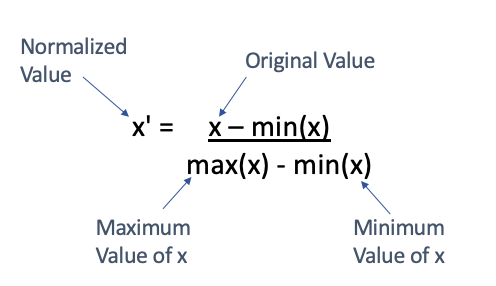

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Original data
data = np.array([[100],
                 [200],
                 [300],
                 [400],
                 [500]])

# Create the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data)
print("Scaled Data:\n", scaled_data)


Original Data:
 [[100]
 [200]
 [300]
 [400]
 [500]]
Scaled Data:
 [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

**Unit Vector Scaling** (also known as Normalization to Unit Norm) is a feature scaling technique where each data point (usually a row vector) is scaled such that the length (or norm) of the vector becomes 1. This technique is often used when the direction of the data point is more important than its magnitude—such as in text classification or clustering tasks with cosine similarity.

#### Difference from Min-Max Scaling:
Min-Max Scaling rescales features to a fixed range (usually [0, 1]) column-wise, based on minimum and maximum values of each feature.

Unit Vector Scaling rescales each row (data sample) so that its L2 norm (Euclidean length) is 1.

Formula:
For a vector 
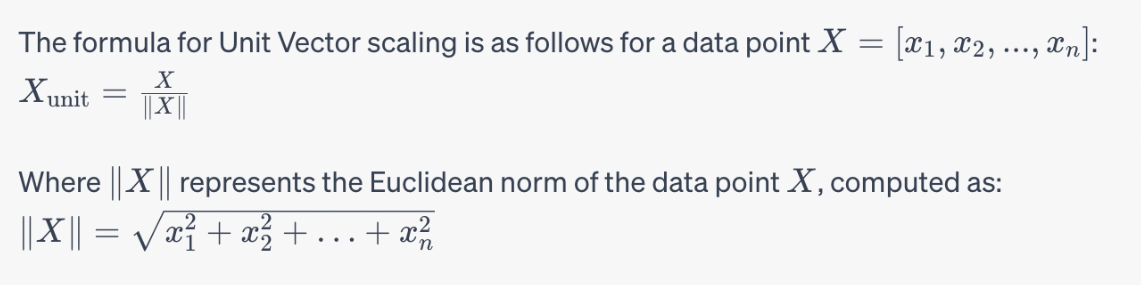

In [13]:
import numpy as np
from sklearn.preprocessing import normalize

# Sample dataset: each row is a data point
data = np.array([[4, 1, 2],
                 [1, 3, 0],
                 [0, 0, 5]])

# Apply unit vector normalization
normalized_data = normalize(data, norm='l2')

print("Original Data:\n", data)
print("\nUnit Vector Normalized Data:\n", normalized_data)


Original Data:
 [[4 1 2]
 [1 3 0]
 [0 0 5]]

Unit Vector Normalized Data:
 [[0.87287156 0.21821789 0.43643578]
 [0.31622777 0.9486833  0.        ]
 [0.         0.         1.        ]]


### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

#### Principal Component Analysis (PCA) 
It is a statistical technique used for dimensionality reduction by transforming a large set of variables into a smaller one that still contains most of the information in the original dataset. PCA identifies the directions (called principal components) along which the variation in the data is maximum, and projects the data onto these new axes.

#### How PCA Works:

Standardize the data.

Compute the covariance matrix of the features.

Compute the eigenvectors and eigenvalues of the covariance matrix.

Sort eigenvectors by decreasing eigenvalues.

Select top k eigenvectors to form the new feature space.

Project data onto the new feature space.

Explained Variance Ratio: [0.9953853 0.0046147]


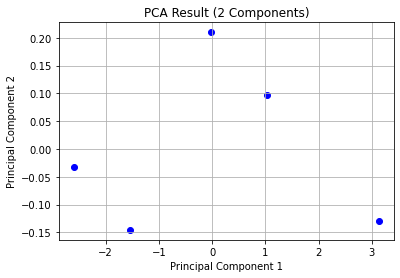

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example dataset (4 features)
data = pd.DataFrame({
    'Feature1': [2, 4, 5, 6, 7],
    'Feature2': [8, 10, 11, 13, 14],
    'Feature3': [1, 3, 4, 5, 6],
    'Feature4': [7, 9, 10, 12, 13]
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Print explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the result
plt.figure(figsize=(6, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (2 Components)')
plt.grid(True)
plt.show()


### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

**Feature extraction** aims to transform the original high-dimensional data into a lower-dimensional representation by combining or selecting relevant features. The objective is to preserve as much relevant information as possible while reducing the data's dimensionality.PCA and feature extraction are closely related to each other and PCA is a feature Extraction technique.

**PCA** achieves feature extraction by identifying the principal components (eigenvectors) of the data, which are the directions along which the data varies the most. These principal components are used to construct a new set of features (the transformed data) that retain most of the important information from the original data. Each principal component is a linear combination of the original features, which allows us to represent the data in a lower-dimensional space.

The principal components are sorted in descending order of their corresponding eigenvalues, representing the amount of variance explained by each component. The top k principal components can be selected to form the new feature set, reducing the dimensionality of the data from the original number of features to k dimensions.

We use PCA for feature extraction to reduce the dimensionality of the data from higher to lower dimension (Here in this example, 3 dimensions to 2 dimensions). The transformed data now contains two principal components, representing the new features. These two principal components capture the most important information in the original data.

By using PCA for feature extraction, we can represent the data in a lower-dimensional space while retaining the primary patterns and relationships between data points

In [15]:
import numpy as np
from sklearn.decomposition import PCA

data = np.array([[2, 8, 6],
                 [3, 7, 9],
                 [5, 4, 2],
                 [8, 1, 5]])

pca_obj = PCA(n_components=2)

trans_data = pca_obj.fit_transform(data)

trans_data

array([[-3.71803234,  1.29322258],
       [-3.79666785, -2.02062546],
       [ 2.53724176,  2.65714845],
       [ 4.97745843, -1.92974557]])

### Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

In the project to build a recommendation system for a food delivery service, Min-Max scaling can be used to preprocess the numerical features such as price, rating, and delivery time. Min-Max scaling will ensure that all these features are transformed to a common scale, typically ranging from 0 to 1, which is essential for the recommendation system to provide accurate and meaningful recommendations.

Min-Max scaling can be applied to preprocess the data:

1.Data Collection: Collect the dataset containing relevant information about food items, including features like price, rating, and delivery time.

2.Data Exploration: Explore the dataset to understand the range and distribution of the numerical features (price, rating, and delivery time).

3.Data Standardization (Optional): Before applying Min-Max scaling, it's essential to check if the numerical features have different scales. If they are already on similar scales, standardization (mean = 0, standard deviation = 1) might not be necessary. However, if features have different ranges, standardization can be performed to bring all features to a common scale.

Min-Max Scaling: Apply Min-Max scaling to each numerical feature. By performing this scaling, all features will be transformed to a common scale, ranging from 0 to 1.

4.Updated Dataset: After Min-Max scaling, you will have an updated dataset with the transformed features, which are now on a common scale.

The Min-Max scaled dataset can then be used to build the recommendation system. When a user requests food recommendations, the system can compare the Min-Max scaled features of different food items to identify the most suitable recommendations based on the user's preferences for price, rating, and delivery time. Min-Max scaling ensures that each of these features contributes equally to the recommendation process, leading to a fair and effective recommendation system for the food delivery service.

In [16]:
#for example we have this data 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({ 'food_item': ['Pizza', 'Burger', 'Pasta', 'Sushi'],
    'price': [12.5, 8.9, 10.0, 15.75],
    'rating': [4.2, 3.8, 4.5, 4.7],
    'delivery_time': [30, 25, 35, 40]})

df.head()

,food_item,price,rating,delivery_time
0,Pizza,12.50,4.2,30
1,Burger,8.90,3.8,25
2,Pasta,10.00,4.5,35
3,Sushi,15.75,4.7,40


In [17]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[['price','rating','delivery_time']]),columns=['scaled_price','scaled_rating','scaled_delivery_time'])
scaled_df

,scaled_price,scaled_rating,scaled_delivery_time
0,0.525547,0.444444,0.333333
1,0.000000,0.000000,0.000000
2,0.160584,0.777778,0.666667
3,1.000000,1.000000,1.000000


In [18]:
pd.concat([df,scaled_df],axis = 1)

,food_item,price,rating,delivery_time,scaled_price,scaled_rating,scaled_delivery_time
0,Pizza,12.50,4.2,30,0.525547,0.444444,0.333333
1,Burger,8.90,3.8,25,0.000000,0.000000,0.000000
2,Pasta,10.00,4.5,35,0.160584,0.777778,0.666667
3,Sushi,15.75,4.7,40,1.000000,1.000000,1.000000


### Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

#### Step-by-Step Use of PCA in the Project:

**1.Understand the Dataset**
First, explore and understand your features—this may include variables like P/E ratio, earnings, volume, volatility, sector indices, etc. Many of these can be correlated or redundant.

**2.Standardize the Features**
Since PCA is sensitive to the scale of variables, standardize the data using z-score normalization (subtract mean and divide by standard deviation). This ensures each feature contributes equally to the analysis.

**3.Apply PCA**
Use PCA to transform the standardized features into principal components. You can choose to retain a number of components that explain a high percentage (e.g., 95%) of the variance in the data.

**4.Interpret Components**
Each principal component is a combination of original features. Although less interpretable, they are uncorrelated and carry the essential information for prediction.

**5.Train the Model on Reduced Data**
Use the transformed dataset (i.e., reduced_data) to train your machine learning model—this reduces computational cost and helps avoid overfitting.

**6.Evaluate Performance**
Compare the model's accuracy and generalization ability with and without PCA to ensure you're improving performance.

### Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = np.array([1,5,10,15,20]).reshape(-1,1)

data

array([[ 1],
       [ 5],
       [10],
       [15],
       [20]])

In [20]:
#creating object
scaler= MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[-1.        ],
       [-0.57894737],
       [-0.05263158],
       [ 0.47368421],
       [ 1.        ]])

### Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

Ans)To perform feature extraction using PCA on the dataset with features [height, weight, age, gender, blood pressure], we need to determine the number of principal components to retain. The number of principal components to keep depends on the amount of variance explained by each principal component. Generally, we aim to retain enough principal components that capture a significant portion of the total variance in the data while reducing the dimensionality.

To decide on the number of principal components we follow these steps:

Perform PCA: Apply PCA to the dataset to obtain the principal components and their corresponding explained variance ratios.

Analyze Explained Variance: Examine the explained variance ratios of each principal component. The explained variance ratio represents the proportion of the dataset's variance that is explained by each principal component.

Scree Plot: Visualize the explained variance ratios in a scree plot to see the proportion of variance explained by each principal component. The plot shows the cumulative explained variance as the number of principal components increases.

Decide on the Number of Components: Choose the number of principal components that cumulatively explain a significant amount of variance in the data. A common approach is to retain enough components to capture a certain percentage of the total variance, e.g., 90% or 95%.

The specific number of principal components to retain may vary depending on the dataset and the desired balance between dimensionality reduction and preserving information.

In [21]:
import numpy as np
from sklearn.decomposition import PCA

# Sample dataset with features [height, weight, age, gender, blood pressure]
# Set the seed for reproducibility
np.random.seed(678)

# Generate random data for each feature
height = np.random.normal(loc=170, scale=10, size=1000)
weight = np.random.normal(loc=70, scale=10, size=1000)
age = np.random.randint(18, 65, size=1000)
gender = np.random.randint(0,1, size=1000)
blood_pressure = np.random.normal(loc=120, scale=10, size=1000)

# Combine the data into a Pandas DataFrame
data = pd.DataFrame({'Height': height, 
                     'Weight': weight, 
                     'Age': age, 
                     'Gender': gender, 
                     'Blood Pressure': blood_pressure})

# Print the first 5 rows of the data
data.head()

,Height,Weight,Age,Gender,Blood Pressure
0,197.264488,84.799980,25,0,124.825452
1,181.909333,66.314008,22,0,138.974266
2,172.938287,69.280096,38,0,113.056646
3,188.764607,82.583661,51,0,129.118854
4,165.582489,60.802114,64,0,120.287752


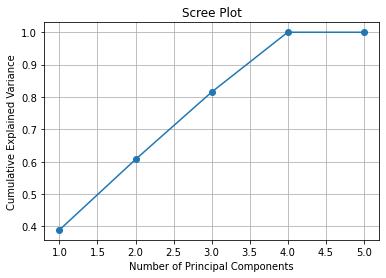

In [22]:
#performing PCA
pca = PCA()
pca.fit_transform(data)

# Analyze explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratios)

# Scree plot
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratios) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()